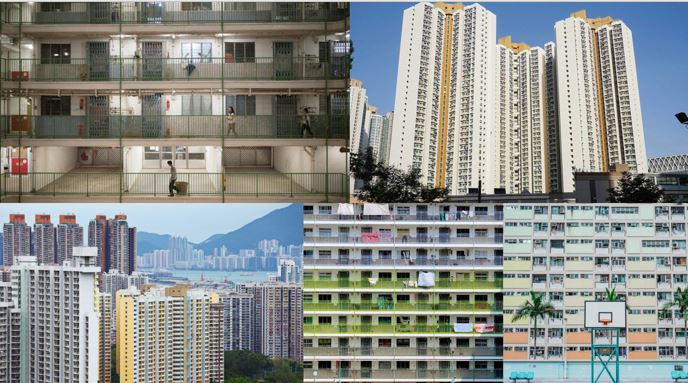

In [1]:
from IPython import display
display.Image("hkph.jpg")

# Data analysis project: Hong Kong Public Housing

**Introduction**

According to the Global Living 2020 report by CBRE research, Hong Kong property price once again became the most expensive place to purchase a property in the world. In general, the property market could be separated into two fields: the private housing side & the public housing side. For the private housing side, I already finished the personal project of Hong Kong private housing data analysis. Please also visit my GitHub repositories and Tableau for details.[1] For the public housing side, even Hong Kong is one of the most prosperous countries, part of citizens still cannot afford this sky-high property price. Therefore the public housing projects are still continuously planing and implementing since the British Hong Kong governance nowadays. It goals to provide a stable living environment for Hong Kong citizens. This project aims to provide a general view of Hong Kong public housing.



**Data Source**



Official Dataset of Location and Profile of Public Housing Estates by Hong Kong Housing Authority:

https://www.housingauthority.gov.hk/datagovhk/prh-estates.json




**Python Library use**

Numpy, Pandas, Requests, Matplotlib, Seaborn, Geopandas, Plotly, Descartes, Folium, 



**Workflow**
 
1. Quick review for the dataset
2. Data cleansing: Datatypes change, string handling, filling missing data
3. Data analysis & visualization: Findindg insights
4. Conclusion

[1] Github: https://github.com/paulcheng0830 Tableau: https://public.tableau.com/profile/pc830

In [3]:
import pandas as pd
import requests
import numpy as np
import matplotlib as plt
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [4]:
response = requests.get('https://www.housingauthority.gov.hk/datagovhk/prh-estates.json')
data = response.json()
df = pd.json_normalize(data)
print(df.columns)

Index(['Estate Map Latitude', 'Estate Map Longitude', 'No. of Blocks',
       'Estate Website', 'Estate Name.en', 'Estate Name.zh-Hant',
       'Estate Name.zh-Hans', 'District Name.en', 'District Name.zh-Hant',
       'District Name.zh-Hans', 'Region Name.en', 'Region Name.zh-Hant',
       'Region Name.zh-Hans', 'Type of Estate.en', 'Type of Estate.zh-Hant',
       'Type of Estate.zh-Hans', 'Year of Intake.en', 'Year of Intake.zh-Hant',
       'Year of Intake.zh-Hans', 'Type(s) of Block(s).en',
       'Type(s) of Block(s).zh-Hant', 'Type(s) of Block(s).zh-Hans',
       'Name of Block(s).en', 'Name of Block(s).zh-Hant',
       'Name of Block(s).zh-Hans', 'No. of Rental Flats.en',
       'No. of Rental Flats.zh-Hant', 'No. of Rental Flats.zh-Hans',
       'Flat Size (m2).en', 'Flat Size (m2).zh-Hant', 'Flat Size (m2).zh-Hans',
       'Estate Management Advisory Committee (EMAC).en',
       'Estate Management Advisory Committee (EMAC).zh-Hant',
       'Estate Management Advisory Committe

In [5]:
ph1 = df[['Estate Map Latitude','Estate Map Longitude', 'No. of Blocks',
          'Estate Name.en','District Name.en',
          'Region Name.en', 'Type of Estate.en',
          'Year of Intake.en','No. of Rental Flats.en',
          'Property Management.en']]
# Selected these columns as analysis features

In [6]:
ph2 = pd.DataFrame(ph1)

In [7]:
ph2 = ph2.rename(columns={"Estate Name.en": "Estate_Name_en",
                          "District Name.en": "District_Name_en",
                          "Region Name.en": "Region_Name_en",
                          "Estate Map Latitude": "Latitude",
                          "Estate Map Longitude": "Longitude",
                          "Type of Estate.en": "Type_of_Estate_en",
                          "Year of Intake.en": "Year_of_Intake_en",
                          "No. of Blocks": "No__of_Blocks",
                          "No. of Rental Flats.en": "No__of_Rental_Flats_en",
                          "Property Management.en": "Property_Management_en"})

In [8]:
ph2 = ph2[[
    'Estate_Name_en',
    'District_Name_en',
    'Region_Name_en',
    'Type_of_Estate_en',
    'Latitude',
    'Longitude',
    'Year_of_Intake_en',
    'No__of_Blocks',
    'No__of_Rental_Flats_en',
    'Property_Management_en']]

In [9]:
ph2.head()

,Estate_Name_en,District_Name_en,Region_Name_en,Type_of_Estate_en,Latitude,Longitude,Year_of_Intake_en,No__of_Blocks,No__of_Rental_Flats_en,Property_Management_en
0,Tak Long Estate,Kowloon City,Kowloon West,Public Rental Housing,22.330105,114.20310,2013,9,8 200 As at 31.3.2021,"Good Excel Property Consultant Ltd<br>G/F, Car..."
1,Kai Ching Estate,Kowloon City,Kowloon West,Public Rental Housing,22.332540,114.20292,2013,6,5 200 As at 31.3.2021,"Good Excel Property Consultants Ltd.<br>1/F, H..."
2,Choi Fook Estate,Kwun Tong,Kowloon East,Public Rental Housing,22.328026,114.21717,"2010, 2021",5,4 500 As at 31.3.2021,"Good Excel Property Consultants Ltd. <br>G/F, ..."
3,Ching Ho Estate,North,New Territories East,Public Rental Housing,22.493110,114.12577,2006,8,7 200 As at 31.3.2021,Creative Property Services Consultants Limited...
4,Hin Yiu Estate,Sha Tin,New Territories East,Public Rental Housing,22.366920,114.17457,2005,1,800 As at 31.3.2021,Creative Property Services Consultants Limited...


# Part 1: Data Cleansing

In [10]:
ph2['Year_of_Intake_en'].unique()

array(['2013', '2010, 2021', '2006', '2005', '1977', '1978 , 2020',
       '1984', '2010', '1999', '1975, 1979, 1998, 1999', '1995',
       '2002 , 2009', '1977, 2020', '1997', '2001', '1996', '2004, 2005',
       '1989', '2012, 2015', '1982 - 1993', '1990', '1988',
       '2004, 2009, 2010, 2011, 2019', '1980', '1987', '1963', '1982',
       '2009', '2010, 2014', '1976', '1998', '1954', '1979', '1994',
       '1983', '1981', '2000', '1986', '1993', '1967', '1970', '1974',
       '1999, 2004', '1991', '2003', '2011', '2009, 2019', '1999, 2011',
       '2008', '1985', '2004', '1997, 2000, 2005, 2008', '1975',
       '1998, 2008, 2012', '2000, 2009', '1993 / 2001', '2002',
       '1977 - 1980', '2001 - 2003', '1980 - 1982', '1962', '1978',
       '1992', '2000 - 2002', '1996 / 1998', '2001, 2003', '2000 / 2001',
       '1976, 2006, 2012, 2019', '2008, 2010', '1958', '1995 - 2004',
       '2015', '2016', '2002, 2007, 2016', '2014',
       '2016 (Phase 1) 2019 (Phase 2)', '2012, 2020', '20

In [11]:
ph2['Year_of_Intake_en'] = ph2['Year_of_Intake_en'].str.split(', ').str[0]
ph2['Year_of_Intake_en'] = ph2['Year_of_Intake_en'].str.split(' - ').str[0]
ph2['Year_of_Intake_en'] = ph2['Year_of_Intake_en'].str.split(' , ').str[0]
ph2['Year_of_Intake_en'] = ph2['Year_of_Intake_en'].str.split(' / ').str[0]

In [12]:
ph2['Year_of_Intake_en'].unique()

array(['2013', '2010', '2006', '2005', '1977', '1978 ', '1984', '1999',
       '1975', '1995', '2002 ', '1997', '2001', '1996', '2004', '1989',
       '2012', '1982', '1990', '1988', '1980', '1987', '1963', '2009',
       '1976', '1998', '1954', '1979', '1994', '1983', '1981', '2000',
       '1986', '1993', '1967', '1970', '1974', '1991', '2003', '2011',
       '2008', '1985', '2002', '1962', '1978', '1992', '1958', '2015',
       '2016', '2014', '2016 (Phase 1) 2019 (Phase 2)', '2018', '2017',
       '2019', '2020', '2020 (Phase 1b)'], dtype=object)

In [13]:
ph2['Year_of_Intake_en'] = ph2['Year_of_Intake_en'].replace("2016 (Phase 1) 2019 (Phase 2)", "2016")
ph2['Year_of_Intake_en'] = ph2['Year_of_Intake_en'].replace("2020 (Phase 1b)", "2020")

In [14]:
ph2['Year_of_Intake_en'] = ph2['Year_of_Intake_en'].astype(int)

In [15]:
ph2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Estate_Name_en          232 non-null    object 
 1   District_Name_en        232 non-null    object 
 2   Region_Name_en          232 non-null    object 
 3   Type_of_Estate_en       232 non-null    object 
 4   Latitude                232 non-null    float64
 5   Longitude               232 non-null    float64
 6   Year_of_Intake_en       232 non-null    int64  
 7   No__of_Blocks           232 non-null    object 
 8   No__of_Rental_Flats_en  232 non-null    object 
 9   Property_Management_en  232 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 18.2+ KB


In [16]:
ph2['No__of_Blocks'] = ph2['No__of_Blocks'].astype(int)

In [17]:
ph2['No__of_Rental_Flats_en'].unique()

array(['8 200 As at 31.3.2021', '5 200 As at 31.3.2021',
       '4 500 As at 31.3.2021', '7 200 As at 31.3.2021',
       '800 As at 31.3.2021', '6 700 As at 31.3.2021',
       '4 900 As at 31.3.2021', '2 300 As at 31.3.2021',
       '2 100 As at 31.3.2021', '5 800 As at 31.3.2021',
       '4 300 As at 31.3.2021', '3 900 As at 31.3.2021',
       '2 000 As at 31.3.2021', '3 000 As at 31.3.2021',
       '1 700 As at 31.3.2021', '400 As at 31.3.2021',
       '300 As at 31.3.2021', '5 600 As at 31.3.2021',
       '6 400 As at 31.3.2021', '800 * As at 31.3.2021',
       '4 800 As at 31.3.2021', '5 900 As at 31.3.2021',
       '4 400 As at 31.3.2021', '900 * As at 31.3.2021',
       '9 000 As at 31.3.2021', '1 600 * As at 31.3.2021',
       '3 100 As at 31.3.2021', '2 500 As at 31.3.2021',
       '500 As at 31.3.2021', '3 600 As at 31.3.2021',
       '700 As at 31.3.2021', '6 100 As at 31.3.2021',
       '400 * As at 31.3.2021', '3 700 As at 31.3.2021',
       '6 600 As at 31.3.2021', '3 400 

In [18]:
ph2['No__of_Rental_Flats_en'] = ph2['No__of_Rental_Flats_en'].str.replace(" As at 31.3.2021", "")
ph2['No__of_Rental_Flats_en']

/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0      8 200
1      5 200
2      4 500
3      7 200
4        800
       ...  
227    2 400
228    1 300
229    1 000
230    2 300
231    4 800
Name: No__of_Rental_Flats_en, Length: 232, dtype: object

In [19]:
ph2['No__of_Rental_Flats_en'] = ph2['No__of_Rental_Flats_en'].str.replace(" ", "")

In [20]:
ph2['No__of_Rental_Flats_en'] = ph2['No__of_Rental_Flats_en'].str.replace("*", "")

/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [21]:
ph2['No__of_Rental_Flats_en'] = ph2['No__of_Rental_Flats_en'].astype('int64')

In [22]:
ph2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Estate_Name_en          232 non-null    object 
 1   District_Name_en        232 non-null    object 
 2   Region_Name_en          232 non-null    object 
 3   Type_of_Estate_en       232 non-null    object 
 4   Latitude                232 non-null    float64
 5   Longitude               232 non-null    float64
 6   Year_of_Intake_en       232 non-null    int64  
 7   No__of_Blocks           232 non-null    int64  
 8   No__of_Rental_Flats_en  232 non-null    int64  
 9   Property_Management_en  232 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 18.2+ KB


In [23]:
ph2['Property_Management_en'].nunique()

201

In [24]:
ph2['Property_Management_en'].unique()

array(['Good Excel Property Consultant Ltd<br>G/F, Carport Building, Tak Long Estate, Kowloon<br>Telephone: 2856 6225<br>Fax: 2856 6100',
       'Good Excel Property Consultants Ltd.<br>1/F, Hong Ching House, Kai Ching Estate, Kowloon<br>Telephone: 2426 9011<br>Fax: 2427 6911',
       'Good Excel Property Consultants Ltd. <br>G/F, Choi Sin House, Choi Fook Estate<br>Telephone: 3417 1090<br>Fax: 3197 0313<br>E-mail: choifook@goodexcel.com.hk',
       'Creative Property Services Consultants Limited<br>G/F, Ching Yu House, Ching Ho Estate, Sheung Shui, N.T.<br>Telephone: 2671 7939<br>Fax: 2671 7484<br>Web site: www.creativepsc.com.hk',
       'Creative Property Services Consultants Limited<br>G/F, Hin Yiu House,<br>Hin Yiu Estate, Sha Tin<br>Telephone: 2278 4000<br>Fax: 2278 4009',
       'Creative Property Services Consultants Limited<br>G/F, Mei Chi House, Mei Tin Estate, Sha Tin<br>Telephone: 2693 0705<br>Fax: 2693 0706',
       'Easy Living Consultant Limited<br>20-29, G/F, Ching Wai 

# Using regex to replace string is more effective

In [26]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].str.split('<br>').str[0]

In [27]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('.+Estate Office+','Housing Authority Property',regex=True)

In [28]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Housing.+','Housing Authority Property',regex=True)

In [29]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('.+Estate Offcie+', 'Housing Authority Property',regex=True)

In [30]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Easy.+','Easy Living Property Management Ltd',regex=True)

In [31]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Nice.+', 'Nice Property Management Ltd',regex=True)

In [32]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Pioneer.+', 'Pioneer Management Ltd',regex=True)

In [33]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Creative.+', 'Creative Property Services Consultants Ltd',regex=True)

In [34]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('China.+', 'China Overseas Property Services Ltd',regex=True)

In [35]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Kai.+', 'Kai Fu Property Services Company Ltd',regex=True)

In [36]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('City.+', 'City Professional Management Ltd',regex=True)

In [37]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Appointed.+', 'Appointed by Owners Corporation',regex=True)

In [38]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Modern.+', 'Modern Living Property Management Ltd',regex=True)

In [39]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Good.+', 'Good Yield Property Management Ltd',regex=True)

In [40]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Sunbase.+', 'Sunbase International Properties Management Ltd',regex=True)

In [41]:
ph2['Property_Management_en'].unique()

array(['Good Yield Property Management Ltd',
       'Creative Property Services Consultants Ltd',
       'Easy Living Property Management Ltd', 'Pioneer Management Ltd',
       '(Blk 1-6, Pak Shue & Yung Shue House)',
       'Kai Fu Property Services Company Ltd',
       'Housing Authority Property',
       'China Overseas Property Services Ltd',
       'Appointed by Owners Corporation',
       'Modern Living Property Management Ltd',
       'Nice Property Management Ltd',
       '(Hoi Lam House, Hoi Yu House, Hoi Wen House)',
       '(Chun Kwai, Ha Kwai, Chau Kwai, Yan Kwai, Pak Kwai and Hop Kwai House)',
       'Funing Property Management Limited',
       'City Professional Management Ltd', 'Top One Limited',
       '(Block 19 -24, 42-44 and Shek Kip Mei Phase 1)',
       'Sunbase International Properties Management Ltd',
       'Unimax Property Consultancy Ltd.',
       '(Ching Chuen, Long Chuen, Yan Chuen, Hei Chuen, Lok Chuen, Shing Chuen, Ho Chuen, Ming Chuen, Yuet Chuen and Ying

In [42]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('(Blk 1-6, Pak Shue & Yung Shue House)', 'Housing Authority Property',regex=True)

In [43]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('(Hoi Lam House, Hoi Yu House, Hoi Wen House)', 'Housing Authority Property',regex=True)

In [44]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('(Chun Kwai, Ha Kwai, Chau Kwai, Yan Kwai, Pak Kwai and Hop Kwai House)', 'Housing Authority Property',regex=True)

In [45]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('(Ching Chuen, Long Chuen, Yan Chuen, Hei Chuen, Lok Chuen, Shing Chuen, Ho Chuen, Ming Chuen, Yuet Chuen and Ying Chuen House)', 'Housing Authority Property',regex=True)

In [46]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('(Block 19 -24, 42-44 and Shek Kip Mei Phase 1)', 'Housing Authority Property',regex=True)

In [47]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Funing Property Management Limited', 'Funing Property Management Ltd',regex=True)

In [48]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].replace('Top One Limited', 'Top One Ltd',regex=True)

In [50]:
ph2['Property_Management_en'] = ph2['Property_Management_en'].str.replace(r"\(.*\)","Housing Authority Property")

/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [51]:
ph2['Property_Management_en'].unique()

array(['Good Yield Property Management Ltd',
       'Creative Property Services Consultants Ltd',
       'Easy Living Property Management Ltd', 'Pioneer Management Ltd',
       'Housing Authority Property',
       'Kai Fu Property Services Company Ltd',
       'China Overseas Property Services Ltd',
       'Appointed by Owners Corporation',
       'Modern Living Property Management Ltd',
       'Nice Property Management Ltd', 'Funing Property Management Ltd',
       'City Professional Management Ltd', 'Top One Ltd',
       'Sunbase International Properties Management Ltd',
       'Unimax Property Consultancy Ltd.'], dtype=object)

# Data cleansing completed. Just save it as csv file for backup
# Part 2: Data Analysis & visualization

In [52]:
ph2.to_csv('ph2_dc_2021.csv', index=False, header=True)

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

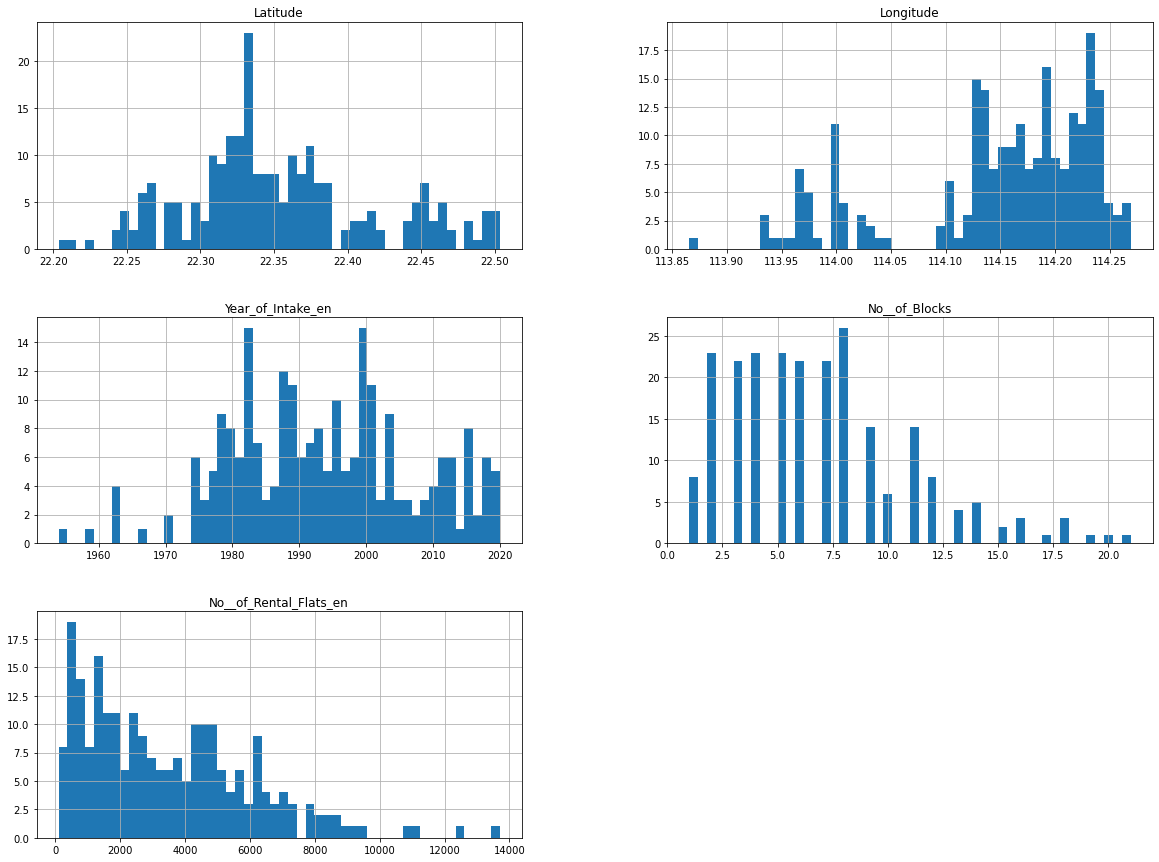

In [53]:
ph2.hist(bins=50, figsize=(20,15))
plt
#Plotting a histogram for each numerical attributes

In [54]:
from geopandas import GeoDataFrame, points_from_xy
ph_geo = GeoDataFrame(ph2, geometry=points_from_xy(ph2.Longitude, ph2.Latitude))
ph_geo.head()
#Using geopandas to create geometry for map visualization

,Estate_Name_en,District_Name_en,Region_Name_en,Type_of_Estate_en,Latitude,Longitude,Year_of_Intake_en,No__of_Blocks,No__of_Rental_Flats_en,Property_Management_en,geometry
0,Tak Long Estate,Kowloon City,Kowloon West,Public Rental Housing,22.330105,114.20310,2013,9,8200,Good Yield Property Management Ltd,POINT (114.20310 22.33010)
1,Kai Ching Estate,Kowloon City,Kowloon West,Public Rental Housing,22.332540,114.20292,2013,6,5200,Good Yield Property Management Ltd,POINT (114.20292 22.33254)
2,Choi Fook Estate,Kwun Tong,Kowloon East,Public Rental Housing,22.328026,114.21717,2010,5,4500,Good Yield Property Management Ltd,POINT (114.21717 22.32803)
3,Ching Ho Estate,North,New Territories East,Public Rental Housing,22.493110,114.12577,2006,8,7200,Creative Property Services Consultants Ltd,POINT (114.12577 22.49311)
4,Hin Yiu Estate,Sha Tin,New Territories East,Public Rental Housing,22.366920,114.17457,2005,1,800,Creative Property Services Consultants Ltd,POINT (114.17457 22.36692)


In [55]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [19, 12]

<AxesSubplot:>

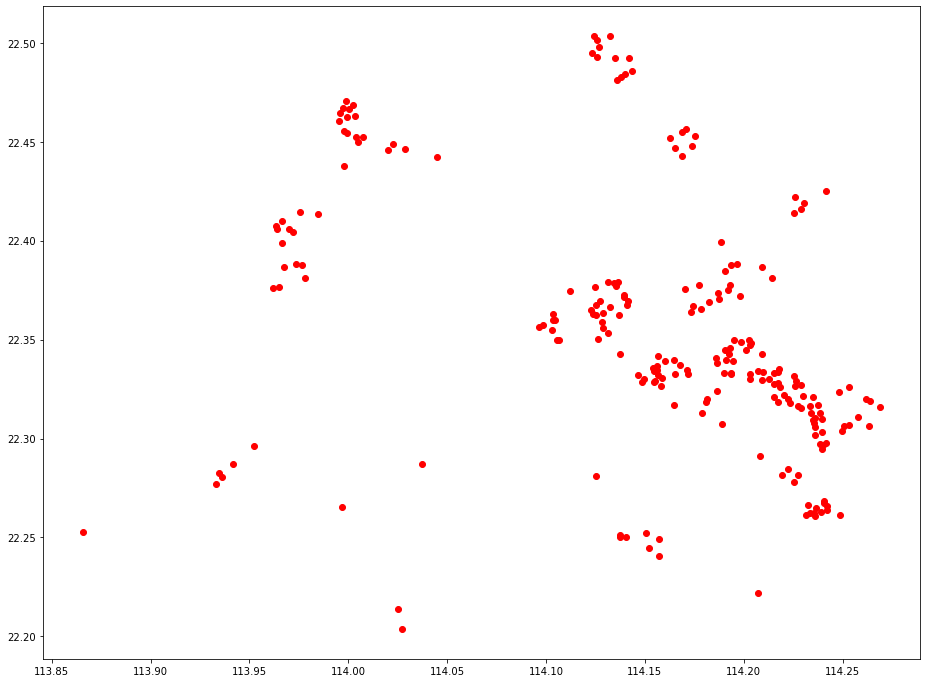

In [56]:
ph_geo.plot(color='red')
#The scatter plot of Hong Kong public housing distribution is ready

<AxesSubplot:>

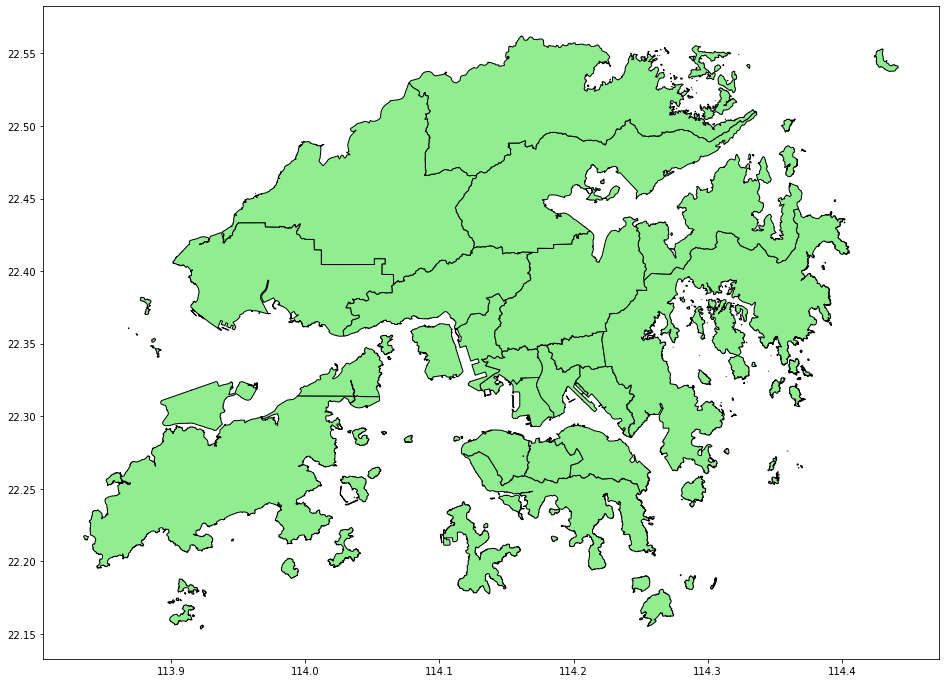

In [57]:
hk = GeoDataFrame.from_file('Hong_Kong_18_Districts/')
hk.plot(color='lightgreen', edgecolor='black')
#Importing geodataframe of Hong Kong map

<AxesSubplot:>

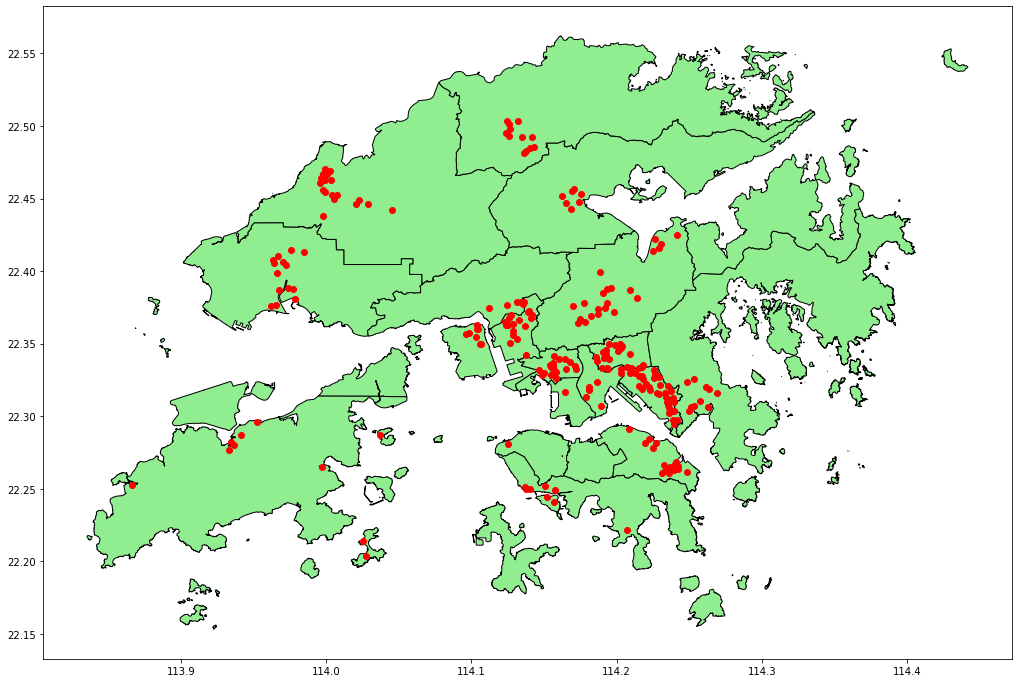

In [58]:
axes = hk.plot(color='lightgreen', edgecolor='black')
ph_geo.plot(ax=axes, color='red')
#Overlap the scatter plot & Hong Kong map
# If you are familiar with Hong Kong geography,
# you may find that most of the public housing is mainly distributed on the downtown area of each district

In [59]:
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [60]:
hkmap = folium.Map(location=[22.302711,114.177216], tiles='openstreetmap', zoom_start=10)
hkmap

In [61]:
from geopandas import GeoDataFrame, points_from_xy
ph_geo = GeoDataFrame(ph2, geometry=points_from_xy(ph2.Longitude, ph2.Latitude))
ph_geo.head()
#Using folium for interactive map to plot the location of Hong Kong public housing

,Estate_Name_en,District_Name_en,Region_Name_en,Type_of_Estate_en,Latitude,Longitude,Year_of_Intake_en,No__of_Blocks,No__of_Rental_Flats_en,Property_Management_en,geometry
0,Tak Long Estate,Kowloon City,Kowloon West,Public Rental Housing,22.330105,114.20310,2013,9,8200,Good Yield Property Management Ltd,POINT (114.20310 22.33010)
1,Kai Ching Estate,Kowloon City,Kowloon West,Public Rental Housing,22.332540,114.20292,2013,6,5200,Good Yield Property Management Ltd,POINT (114.20292 22.33254)
2,Choi Fook Estate,Kwun Tong,Kowloon East,Public Rental Housing,22.328026,114.21717,2010,5,4500,Good Yield Property Management Ltd,POINT (114.21717 22.32803)
3,Ching Ho Estate,North,New Territories East,Public Rental Housing,22.493110,114.12577,2006,8,7200,Creative Property Services Consultants Ltd,POINT (114.12577 22.49311)
4,Hin Yiu Estate,Sha Tin,New Territories East,Public Rental Housing,22.366920,114.17457,2005,1,800,Creative Property Services Consultants Ltd,POINT (114.17457 22.36692)


In [66]:
hkmap2 = folium.Map(location=[22.302711,114.177216], tiles='cartodbpositron', zoom_start=10)

# Add points to the map
for idx, row in ph_geo.iterrows():
    Marker([row['Latitude'], row['Longitude']]).add_to(hkmap2)

hkmap2

In [67]:
ph2['Region_Name_en'].value_counts()
# Although the above map shows the public housing estates that highly concentrated on Kowloon instead of New Territories
# In reality, the public housing estates are built on New Territories West mostly at region level

New Territories West    73
Kowloon East            55
New Territories East    51
Kowloon West            27
Hong Kong Island        26
Name: Region_Name_en, dtype: int64

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

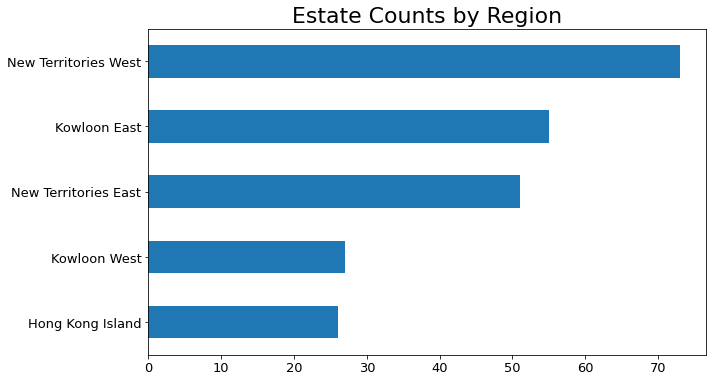

In [69]:
count_region = pd.value_counts(ph2['Region_Name_en'].values, ascending=True)
c_region = count_region.plot(kind='barh', figsize=(10,6), fontsize=13)
c_region.set_alpha(0.8)
c_region.set_title("Estate Counts by Region", fontsize=22)
plt

In [70]:
ph2['District_Name_en'].value_counts()

Kwun Tong            34
Kwai Tsing           25
Sha Tin              22
Wong Tai Sin         21
Sham Shui Po         19
Yuen Long            18
Eastern              17
Tuen Mun             14
North                12
Islands              10
Sai Kung             10
Southern              8
Tai Po                7
Kowloon City          7
Tsuen Wan             6
Yau Tsim Mong         1
Central & Western     1
Name: District_Name_en, dtype: int64

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

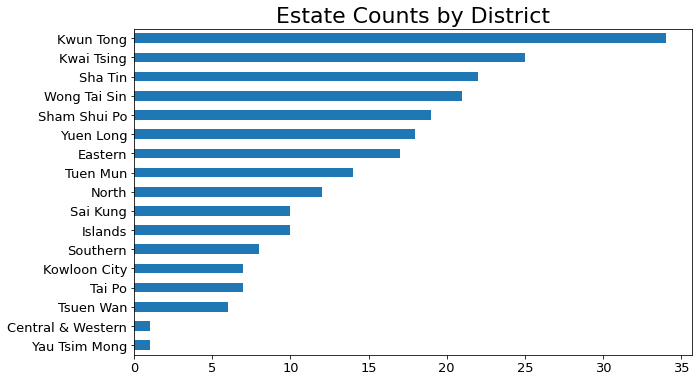

In [71]:
count_district = pd.value_counts(ph2['District_Name_en'].values, ascending=True)
c_district = count_district.plot(kind='barh', figsize=(10,6), fontsize=13)
c_district.set_alpha(0.8)
c_district.set_title("Estate Counts by District", fontsize=22)
plt

In [72]:
estate_type_table = ph2['Type_of_Estate_en'].value_counts().rename_axis('Type of Estate').reset_index(name='Counts')
estate_type_table

,Type of Estate,Counts
0,Public Rental Housing,188
1,Tenants Purchase Scheme,39
2,Public Rental Housing / Buy or Rent Option,3
3,Public Rental Housing / Interim Housing,2


In [73]:
estate_type_table['percentage'] =  (estate_type_table['Counts'] / estate_type_table['Counts'].sum()) * 100
estate_type_table

,Type of Estate,Counts,percentage
0,Public Rental Housing,188,81.034483
1,Tenants Purchase Scheme,39,16.810345
2,Public Rental Housing / Buy or Rent Option,3,1.293103
3,Public Rental Housing / Interim Housing,2,0.862069


<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

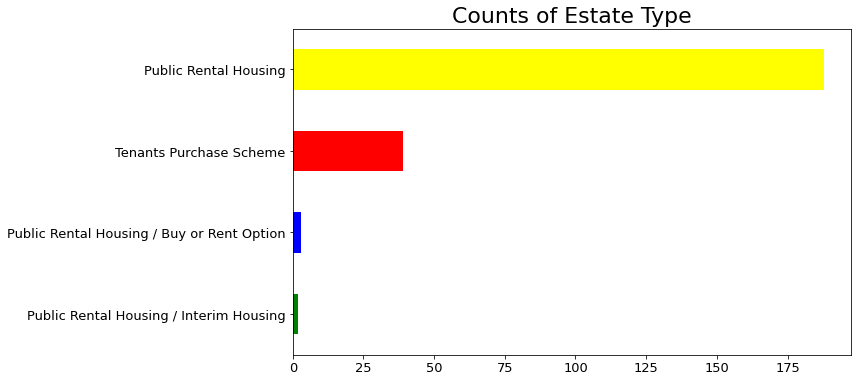

In [74]:
count_etype = pd.value_counts(ph2['Type_of_Estate_en'].values, ascending=True)
c_etype = count_etype.plot(kind='barh', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'], fontsize=13)
c_etype.set_alpha(0.8)
c_etype.set_title("Counts of Estate Type", fontsize=22)
plt

In [75]:
ph2['Year_of_Intake_en'].unique()

array([2013, 2010, 2006, 2005, 1977, 1978, 1984, 1999, 1975, 1995, 2002,
       1997, 2001, 1996, 2004, 1989, 2012, 1982, 1990, 1988, 1980, 1987,
       1963, 2009, 1976, 1998, 1954, 1979, 1994, 1983, 1981, 2000, 1986,
       1993, 1967, 1970, 1974, 1991, 2003, 2011, 2008, 1985, 1962, 1992,
       1958, 2015, 2016, 2014, 2018, 2017, 2019, 2020])

In [84]:
ph2['Year_of_Intake_en'].min()

1954

In [83]:
ph2['Year_of_Intake_en'].max()

2020

In [85]:
intake_bin = ph2['Year_of_Intake_en']

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

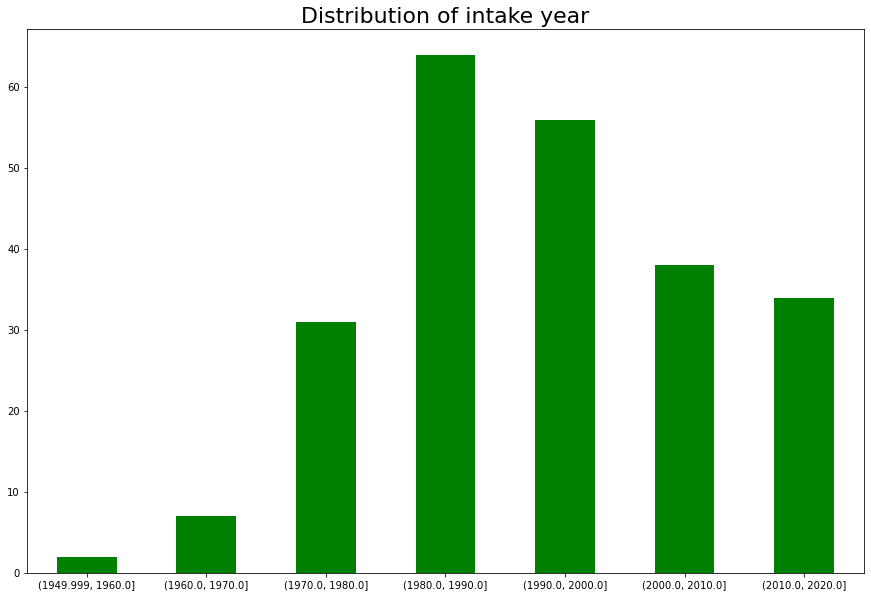

In [89]:
intake_range = pd.cut(intake_bin, bins=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], include_lowest=True)
intake_year_plot = intake_range.value_counts(sort=False).plot.bar(rot=0, color="green", figsize=(15,10))
intake_year_plot.set_alpha(0.8)
intake_year_plot.set_title("Distribution of intake year", fontsize=22)
plt

<AxesSubplot:xlabel='Year_of_Intake_en', ylabel='No__of_Rental_Flats_en'>

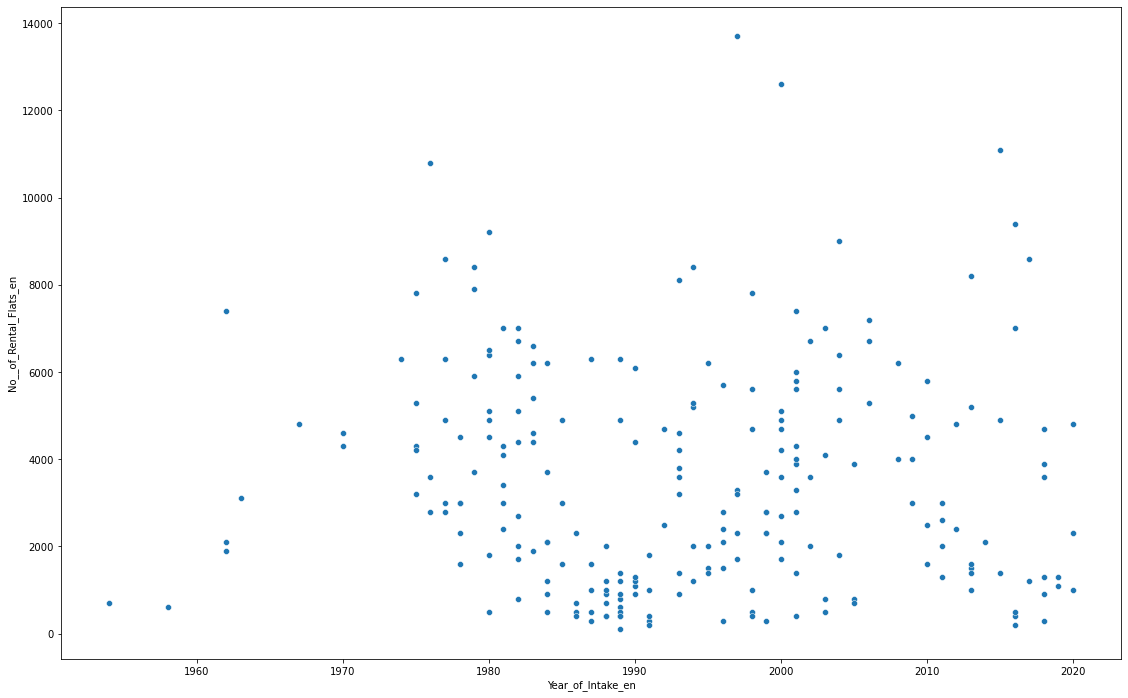

In [87]:
sns.scatterplot(x=ph2['Year_of_Intake_en'], y=ph2['No__of_Rental_Flats_en'])
#Using scatter plot is easier to analyise the relationship bwtween intake year & number of rental flats

<AxesSubplot:xlabel='Year_of_Intake_en', ylabel='No__of_Rental_Flats_en'>

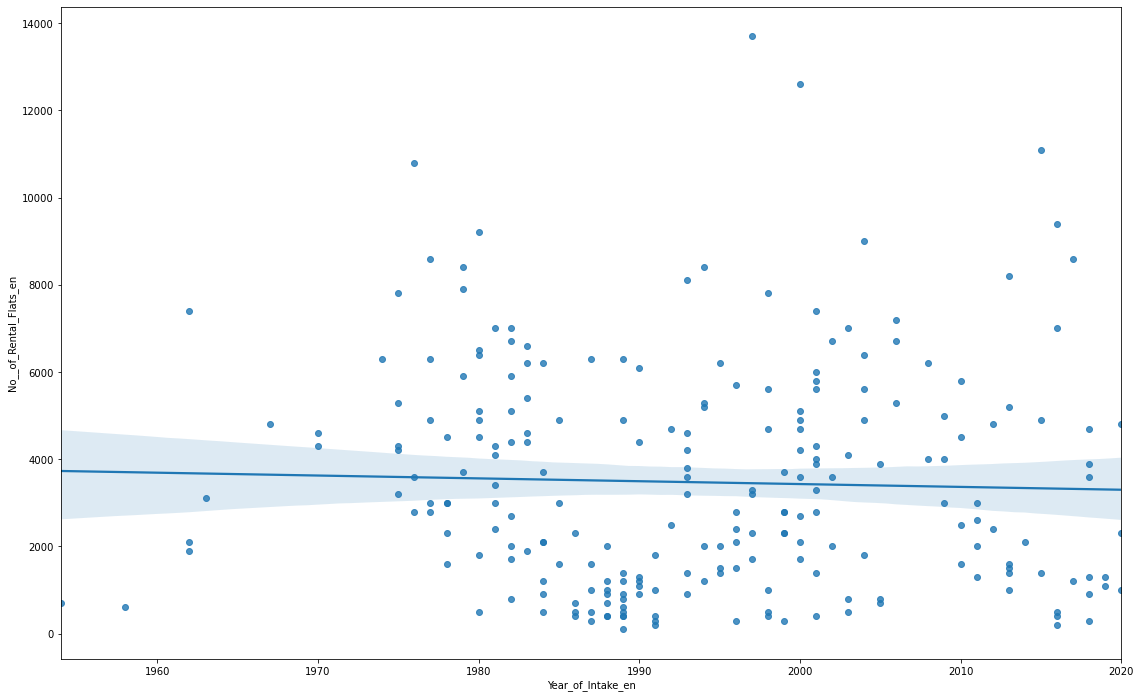

In [88]:
sns.regplot(x=ph2['Year_of_Intake_en'], y=ph2['No__of_Rental_Flats_en'])

In [90]:
ph2['No__of_Blocks'].unique()

array([ 9,  6,  5,  8,  1,  4,  3, 11, 13, 12, 18, 10, 14,  2,  7, 16, 15,
       17, 20, 19, 21])

In [91]:
blocks_bin = ph2['No__of_Blocks']

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

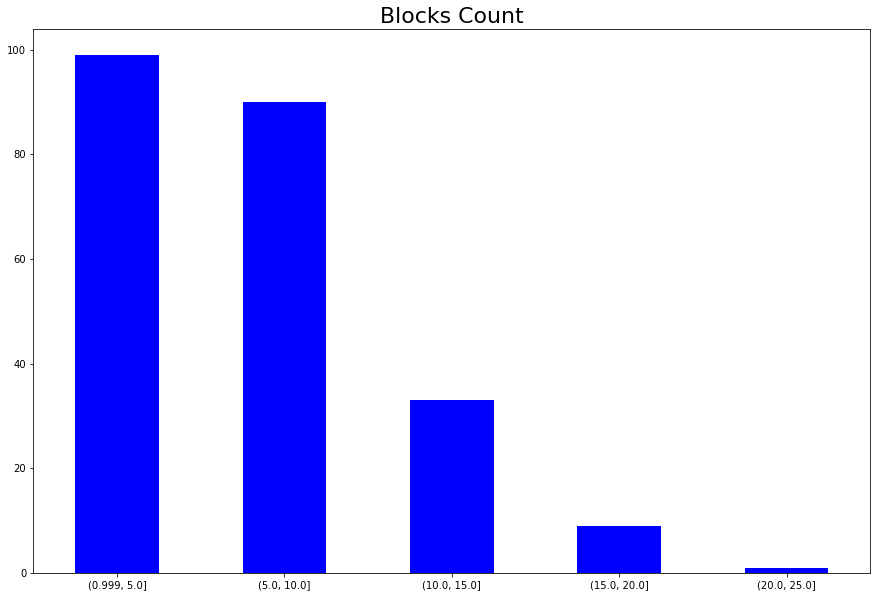

In [92]:
blocks_range = pd.cut(blocks_bin, bins=[1, 5, 10, 15, 20, 25], include_lowest=True)
blocks_plot = blocks_range.value_counts(sort=False).plot.bar(rot=0, color="blue", figsize=(15, 10))
blocks_plot.set_alpha(0.8)
blocks_plot.set_title("Blocks Count", fontsize=22)
plt

In [93]:
selected_flats_block = ph2[["Estate_Name_en", "District_Name_en", "Region_Name_en", "Year_of_Intake_en", "No__of_Blocks", "No__of_Rental_Flats_en"]]
flats_block_ratio = selected_flats_block.copy()
# Creating new dataframe aims to calculate 'Flats-block ratio'
# 'Flats-block ratio' means the average accommodating the total rental flats of each block
# This concept is related to the density of the estate
# We will focus on top and bottom 20 of the Flats-block ratio

In [94]:
flats_block_ratio

,Estate_Name_en,District_Name_en,Region_Name_en,Year_of_Intake_en,No__of_Blocks,No__of_Rental_Flats_en
0,Tak Long Estate,Kowloon City,Kowloon West,2013,9,8200
1,Kai Ching Estate,Kowloon City,Kowloon West,2013,6,5200
2,Choi Fook Estate,Kwun Tong,Kowloon East,2010,5,4500
3,Ching Ho Estate,North,New Territories East,2006,8,7200
4,Hin Yiu Estate,Sha Tin,New Territories East,2005,1,800
...,...,...,...,...,...,...
227,Shek Yam East Estate,Kwai Tsing,New Territories West,1996,3,2400
228,Lai Tsui Court,Sham Shui Po,Kowloon West,2019,2,1300
229,Fai Ming Estate,North,New Territories East,2020,2,1000
230,Hoi Tat Estate,Sham Shui Po,Kowloon West,2020,1,2300


In [95]:
flats_block_ratio["flats_block"] = flats_block_ratio["No__of_Rental_Flats_en"] / flats_block_ratio["No__of_Blocks"]

In [96]:
top20_flats_block = flats_block_ratio.sort_values(by=['flats_block'], ascending=False).head(20)
top20_flats_block

,Estate_Name_en,District_Name_en,Region_Name_en,Year_of_Intake_en,No__of_Blocks,No__of_Rental_Flats_en,flats_block
230,Hoi Tat Estate,Sham Shui Po,Kowloon West,2020,1,2300,2300.000000
32,Mei Tung Estate,Wong Tai Sin,Kowloon East,2010,2,2500,1250.000000
137,Tai Hing Estate,Tuen Mun,New Territories West,1977,7,8600,1228.571429
169,Lok Wah South Estate,Kwun Tong,Kowloon East,1982,6,7000,1166.666667
87,Mei Lam Estate,Sha Tin,New Territories East,1981,4,4100,1025.000000
80,Shin Ming Estate,Sai Kung,New Territories East,2011,2,2000,1000.000000
224,Mun Tung Estate,Islands,New Territories West,2018,4,3900,975.000000
231,Chun Yeung Estate,Sha Tin,New Territories East,2020,5,4800,960.000000
219,Yan Tin Estate,Tuen Mun,New Territories West,2018,5,4700,940.000000
92,Sha Kok Estate,Sha Tin,New Territories East,1980,7,6400,914.285714


In [97]:
top20_flats_block.groupby(by="Region_Name_en").size().sort_values(ascending=False)

Region_Name_en
New Territories West    7
New Territories East    6
Kowloon East            4
Kowloon West            3
dtype: int64

In [98]:
top20_flats_block.groupby(by="District_Name_en").size().sort_values(ascending=False)

District_Name_en
Sha Tin         4
Kwun Tong       3
Tuen Mun        3
Islands         2
Kowloon City    2
Kwai Tsing      1
North           1
Sai Kung        1
Sham Shui Po    1
Wong Tai Sin    1
Yuen Long       1
dtype: int64

In [103]:
bottom20_flats_block = flats_block_ratio.sort_values(by=['flats_block'], ascending=True).tail(20)
bottom20_flats_block

,Estate_Name_en,District_Name_en,Region_Name_en,Year_of_Intake_en,No__of_Blocks,No__of_Rental_Flats_en,flats_block
217,On Tat Estate,Kwun Tong,Kowloon East,2016,11,9400,854.545455
109,Kwai Chung Estate,Kwai Tsing,New Territories West,1997,16,13700,856.250000
1,Kai Ching Estate,Kowloon City,Kowloon West,2013,6,5200,866.666667
159,Yan On Estate,Sha Tin,New Territories East,2011,3,2600,866.666667
189,Tin Ching Estate,Yuen Long,New Territories West,2008,7,6200,885.714286
3,Ching Ho Estate,North,New Territories East,2006,8,7200,900.000000
2,Choi Fook Estate,Kwun Tong,Kowloon East,2010,5,4500,900.000000
218,Ying Tung Estate,Islands,New Territories West,2018,4,3600,900.000000
188,Butterfly Estate,Tuen Mun,New Territories West,1983,6,5400,900.000000
0,Tak Long Estate,Kowloon City,Kowloon West,2013,9,8200,911.111111


In [104]:
bottom20_flats_block.groupby(by="Region_Name_en").size().sort_values(ascending=False)

Region_Name_en
New Territories West    7
New Territories East    6
Kowloon East            4
Kowloon West            3
dtype: int64

In [105]:
bottom20_flats_block.groupby(by="District_Name_en").size().sort_values(ascending=False)

District_Name_en
Sha Tin         4
Kwun Tong       3
Tuen Mun        3
Islands         2
Kowloon City    2
Kwai Tsing      1
North           1
Sai Kung        1
Sham Shui Po    1
Wong Tai Sin    1
Yuen Long       1
dtype: int64

In [106]:
region_flats_sum = ph2.groupby(['Region_Name_en'])['No__of_Rental_Flats_en'].agg('sum')
region_flats_sum.sort_values(ascending=False)

Region_Name_en
New Territories West    271500
Kowloon East            224400
New Territories East    147800
Kowloon West             99300
Hong Kong Island         62300
Name: No__of_Rental_Flats_en, dtype: int64

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

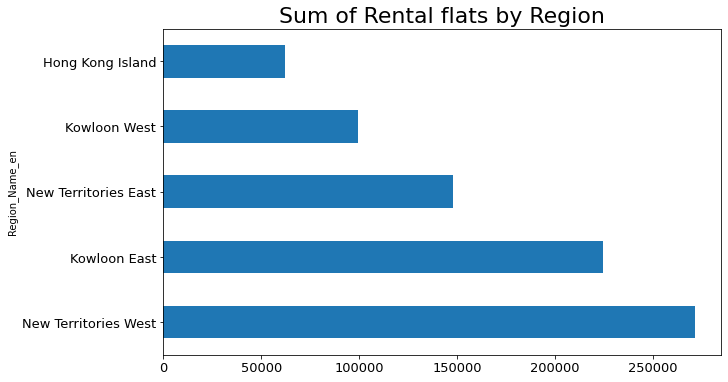

In [114]:
region_sum_flats = region_flats_sum.sort_values(ascending=False)
region_flats = region_sum_flats.plot(kind='barh', figsize=(10,6), fontsize=13)
region_flats.set_alpha(0.8)
region_flats.set_title("Sum of Rental flats by Region", fontsize=22)
plt

In [115]:
district_flats_sum = ph2.groupby(['District_Name_en'])['No__of_Rental_Flats_en'].agg('sum')
district_flats_sum.sort_values(ascending=False)

District_Name_en
Kwun Tong            147600
Kwai Tsing           101200
Sha Tin               78800
Wong Tai Sin          76800
Yuen Long             67700
Sham Shui Po          66800
Tuen Mun              57600
Eastern               36200
Kowloon City          29700
Sai Kung              28600
Southern              25500
North                 24100
Islands               23300
Tsuen Wan             21700
Tai Po                16300
Yau Tsim Mong          2800
Central & Western       600
Name: No__of_Rental_Flats_en, dtype: int64

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

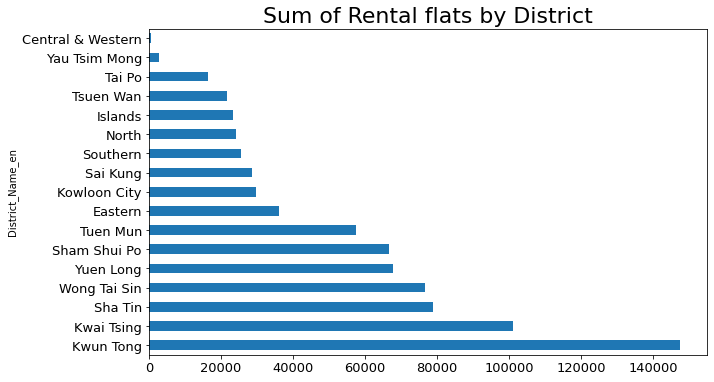

In [116]:
district_sum_flats = district_flats_sum.sort_values(ascending=False)
district_flats = district_sum_flats.plot(kind='barh', figsize=(10,6), fontsize=13)
district_flats.set_alpha(0.8)
district_flats.set_title('Sum of Rental flats by District', fontsize=22)
plt

In [117]:
estate_type_flats_sum = ph2.groupby(['Type_of_Estate_en'])['No__of_Rental_Flats_en'].agg('sum')
estate_type_flats_sum.sort_values(ascending=False)

Type_of_Estate_en
Public Rental Housing                         743400
Tenants Purchase Scheme                        41500
Public Rental Housing / Interim Housing        13100
Public Rental Housing / Buy or Rent Option      7300
Name: No__of_Rental_Flats_en, dtype: int64

<module 'matplotlib' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py'>

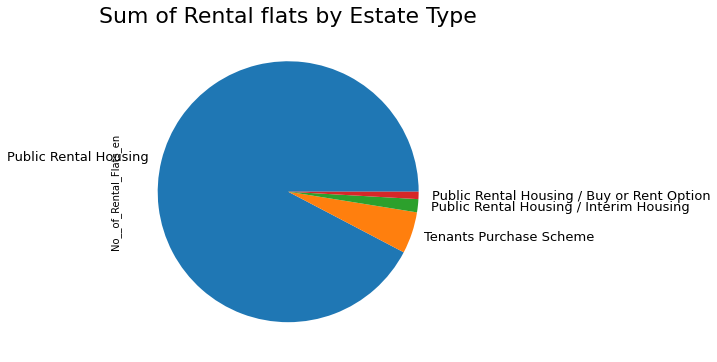

In [118]:
etype_sum_flats = estate_type_flats_sum.sort_values(ascending=False)
etype_flats = etype_sum_flats.plot(kind='pie', figsize=(10,6), fontsize=13)
etype_flats.set_alpha(0.8)
etype_flats.set_title('Sum of Rental flats by Estate Type', fontsize=22)
plt

In [162]:
sum_block_flats = ph2.groupby(["District_Name_en"]).agg(sum_block = ('No__of_Blocks','sum'),sum_flats = ('No__of_Rental_Flats_en','sum'),).reset_index()
sum_block_flats
#Using scatter plot to find out the relationship between total of blocks and total of rental flats by district

,District_Name_en,sum_block,sum_flats
0,Central & Western,5,600
1,Eastern,80,36200
2,Islands,70,23300
3,Kowloon City,47,29700
4,Kwai Tsing,184,101200
5,Kwun Tong,242,147600
6,North,57,24100
7,Sai Kung,58,28600
8,Sha Tin,147,78800
9,Sham Shui Po,150,66800


Text(0, 0.5, 'Sum Flats')

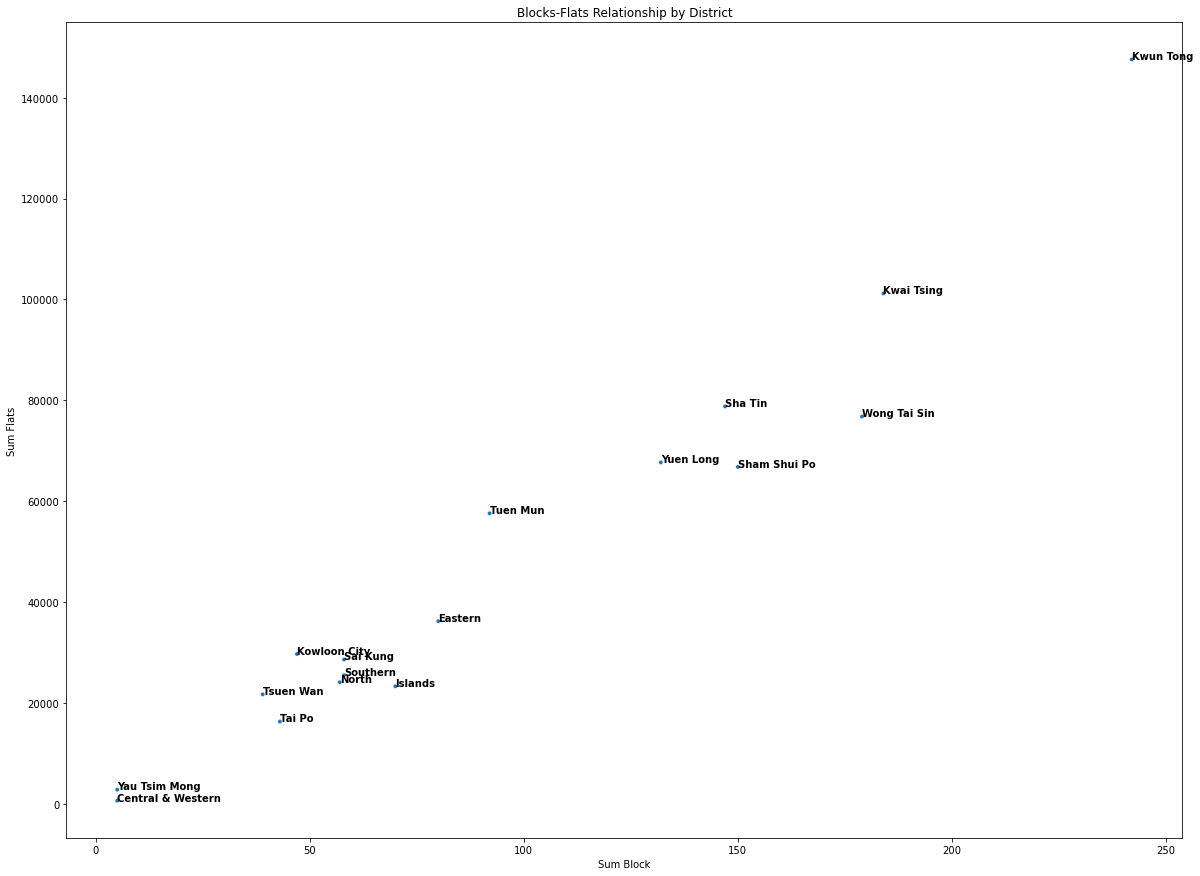

In [166]:
plt.figure(figsize=(20,15))
p1 = sns.scatterplot(x = 'sum_block', y = 'sum_flats', data=sum_block_flats, size=8, legend=False)

for line in range(0,sum_block_flats.shape[0]):
     p1.text(sum_block_flats.sum_block[line]+0.01, sum_block_flats.sum_flats[line], 
     sum_block_flats.District_Name_en[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.title('Blocks-Flats Relationship by District')
plt.xlabel('Sum Block')
plt.ylabel('Sum Flats')

<AxesSubplot:xlabel='sum_block', ylabel='sum_flats'>

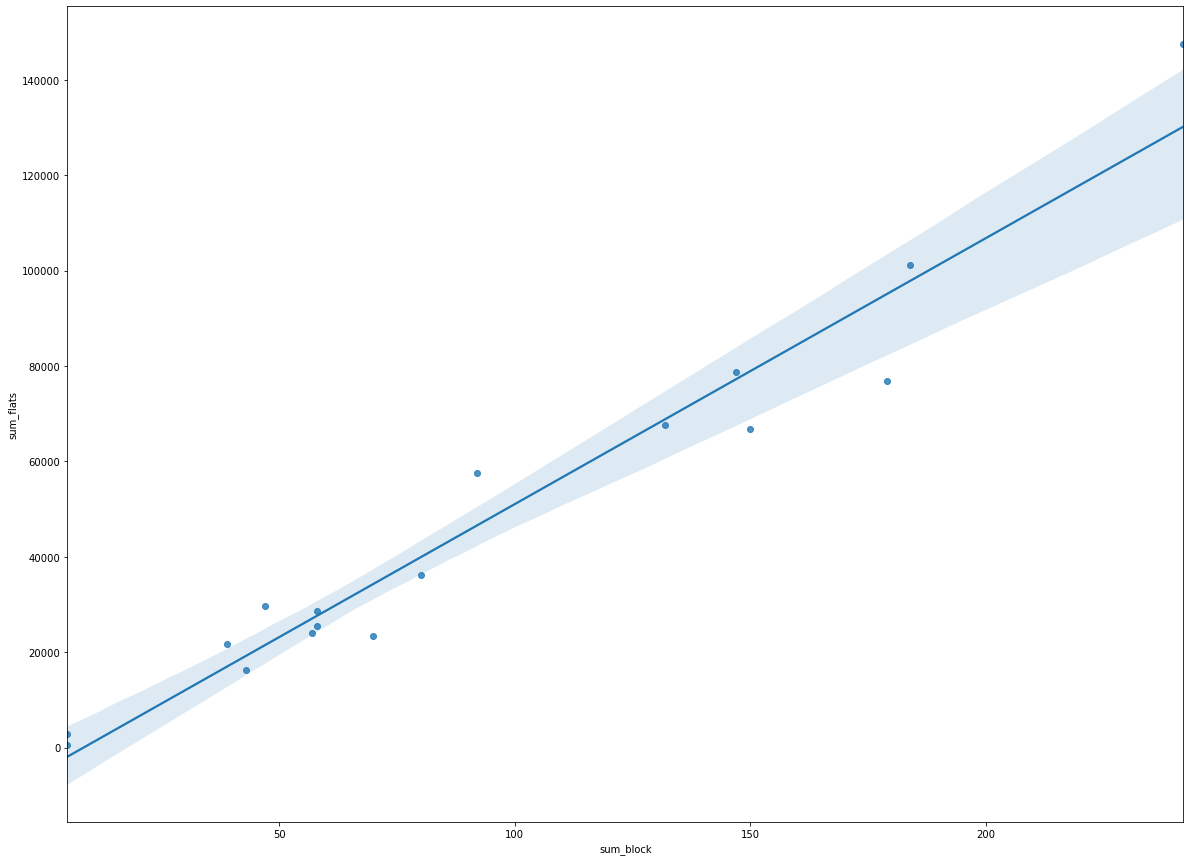

In [167]:
plt.figure(figsize=(20,15))
sns.regplot(data=sum_block_flats, x="sum_block", y="sum_flats")
#Create regplot for comparision

In [168]:
property_mght_table = ph2['Property_Management_en'].value_counts().rename_axis('Property Management').reset_index(name='Counts')
property_mght_table
# Property management company is one of the essential elements of public housing

,Property Management,Counts
0,Housing Authority Property,63
1,Appointed by Owners Corporation,35
2,Good Yield Property Management Ltd,20
3,Creative Property Services Consultants Ltd,20
4,China Overseas Property Services Ltd,18
5,Modern Living Property Management Ltd,17
6,Pioneer Management Ltd,16
7,Nice Property Management Ltd,15
8,Easy Living Property Management Ltd,11
9,Kai Fu Property Services Company Ltd,7


<module 'matplotlib.pyplot' from '/Users/paulcheng/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

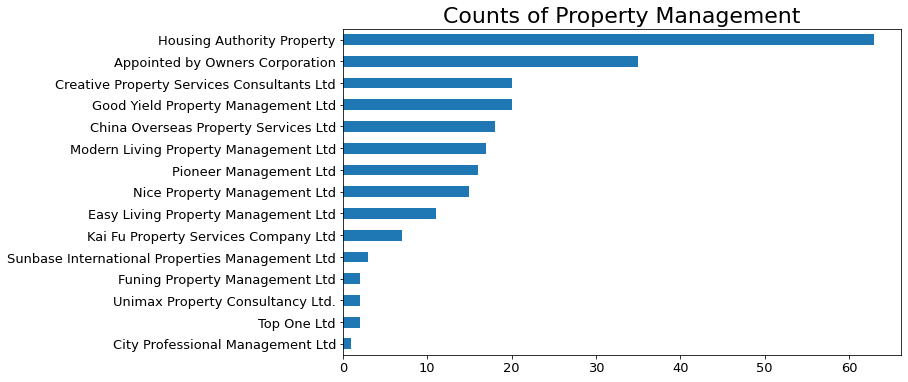

In [169]:
count_property_mght = pd.value_counts(ph2['Property_Management_en'].values, ascending=True)
c_pm = count_property_mght.plot(kind='barh', figsize=(10,6), fontsize=13)
c_pm.set_alpha(0.8)
c_pm.set_title("Counts of Property Management", fontsize=22)
plt

# Conclusion

1. Geographically, the public housing estates are mostly built on New Territories West(Counts: 73), Kowloon East(Counts: 55) and New Territories East (Counts: 51) at the regional level. At the district level, Kwun Tong(Counts: 34), Kwai Tsing(Counts: 25) and Sha Tin(Counts: 22)are the top 3 of the largest number of public housing estates. 

2. 81% Estate type is public rental housing, which means most public housing could not sell and own by the Hong Kong government. However, some public housing could buy or rent under the tenants' purchase scheme (16.8%).

3. Most of the public housing was built in 1990 - 2010 due to the British colonial Hong Kong government response to the rapid economic growth.

4. If we focus on the intake year between 1980 -2000, it is easy to find that most of the small number of rental flats was built in this era.

5. Flats-Block Ratio is useful for finding which estate is more intensive: Hoi Tat Estate (Region: Kowloon West), Mei Tung Estate (Region: Kowloon East) and Tai Hing Estate(Region: New Territories West) is the top 3 intensive public estate. 

6. Not surprisingly, most of the property management company is Housing Authority Property due to the nature of public housing is mostly owned by Hong Kong government. However, the Carpark Management is mostly owned and operated by a private corporation.